In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cufflinks as cf
cf.go_offline()
import plotly as plt
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [79]:
init_notebook_mode(connected=True)

In [63]:
train=pd.read_csv('C:/Users/sam/Desktop/csv/train.csv')

In [64]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [66]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [67]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


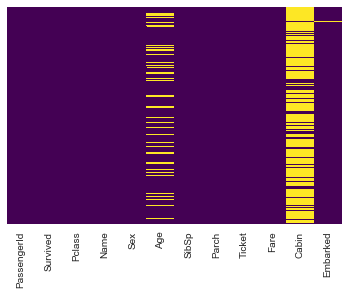

In [68]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [69]:
sns.set_style('whitegrid')

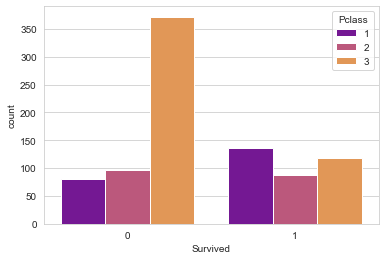

In [70]:
sns.countplot(x='Survived',hue='Pclass',data=train,palette='plasma')

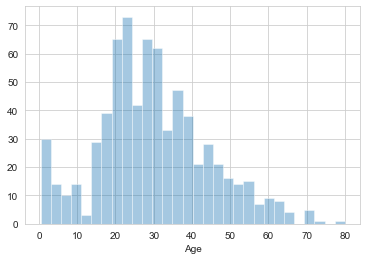

In [71]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

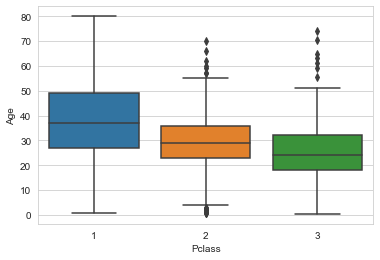

In [100]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [98]:
train['Age'].iplot(kind='box')

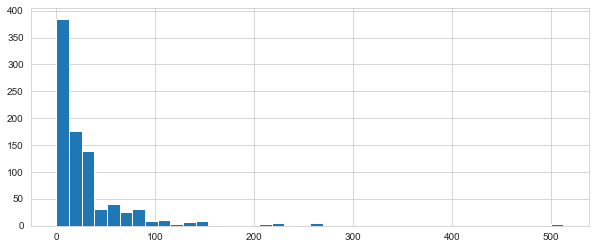

In [73]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [99]:
train['Fare'].iplot(kind='scatter',mode='markers',size=6,color='green')

In [105]:
def input_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 24
        else:
            return 24
    else:
        return Age
    

In [106]:
train['Age']=train[['Age','Pclass']].apply(input_age,axis=1)

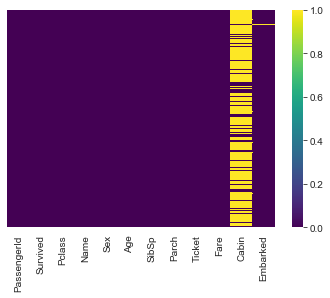

In [111]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

In [112]:
train.drop('Cabin',axis=1,inplace=True)

In [113]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [118]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [124]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [130]:
train=pd.concat([train,sex,embark],axis=1)

In [134]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [142]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,0,3,22.0,1,0,A/5 21171,7.2500,1,0,1
1,1,1,38.0,1,0,PC 17599,71.2833,0,0,0
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,1,1,35.0,1,0,113803,53.1000,0,0,1
4,0,3,35.0,0,0,373450,8.0500,1,0,1


In [144]:
train.drop(['Ticket'],axis=1,inplace=True)

In [145]:
train.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1


In [146]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [147]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [149]:
from sklearn.model_selection import train_test_split

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [152]:
from sklearn.linear_model import LogisticRegression

In [153]:
model=LogisticRegression()

In [155]:
model.fit(X_train,y_train)

C:\Users\sam\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [157]:
predictions=model.predict(X_test)

In [163]:
from sklearn.metrics import classification_report

In [161]:
from sklearn.metrics import confusion_matrix

In [166]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       169
           1       0.82      0.69      0.75       126

    accuracy                           0.80       295
   macro avg       0.81      0.79      0.79       295
weighted avg       0.81      0.80      0.80       295



In [167]:
print(confusion_matrix(y_test,predictions))

[[150  19]
 [ 39  87]]
